In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
# Load dataset
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
             'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
             'hours_per_week', 'native_country', 'income']

df = pd.read_csv('/content/drive/MyDrive/bengkod/adult.csv', names=col_names, na_values=" ?")

In [7]:
# Lihat 5 data pertama
print("Preview of the dataset:")
print(df.head())

# Informasi dataset
print("\nInfo Dataset:")
df.info()


Preview of the dataset:
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              4

In [8]:
# Statistik deskriptif
print("\nDeskripsi Statistik:")
print(df.describe())

# Hapus baris dengan missing values
print("\nSebelum menghapus missing values:", df.shape)
df.dropna(inplace=True)
print("Setelah menghapus missing values:", df.shape)



Deskripsi Statistik:
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

Sebelum menghapus missing values: (32561

In [9]:
# Encoding data kategori menjadi numerik
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Pemisahan fitur dan target
X = df.drop(['income'], axis=1)
y = df['income']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# MODEL 1: DECISION TREE
print("\n--- MODEL 1: DECISION TREE ---")

# Membuat model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


--- MODEL 1: DECISION TREE ---


DecisionTreeClassifier(random_state=42)

In [11]:
# Prediksi pada data training
dt_train_pred = dt_model.predict(X_train)
dt_train_accuracy = accuracy_score(y_train, dt_train_pred)
print(f"Akurasi Training Decision Tree: {dt_train_accuracy*100:.2f}%")

# Prediksi pada data testing
dt_test_pred = dt_model.predict(X_test)
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
print(f"Akurasi Testing Decision Tree: {dt_test_accuracy*100:.2f}%")

Akurasi Training Decision Tree: 100.00%
Akurasi Testing Decision Tree: 80.89%


In [12]:
# Evaluasi model Decision Tree
print("\nConfusion Matrix Decision Tree:")
dt_cm = confusion_matrix(y_test, dt_test_pred)
print(dt_cm)

print("\nClassification Report Decision Tree:")
dt_report = classification_report(y_test, dt_test_pred, output_dict=True)
print(classification_report(y_test, dt_test_pred))



Confusion Matrix Decision Tree:
[[3930  573]
 [ 580  950]]

Classification Report Decision Tree:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4503
           1       0.62      0.62      0.62      1530

    accuracy                           0.81      6033
   macro avg       0.75      0.75      0.75      6033
weighted avg       0.81      0.81      0.81      6033



In [14]:
# Membuat model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
# Prediksi pada data training
rf_train_pred = rf_model.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
print(f"Akurasi Training Random Forest: {rf_train_accuracy*100:.2f}%")

# Prediksi pada data testing
rf_test_pred = rf_model.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
print(f"Akurasi Testing Random Forest: {rf_test_accuracy*100:.2f}%")


Akurasi Training Random Forest: 100.00%
Akurasi Testing Random Forest: 85.53%


In [ ]:
# Evaluasi model Random Forest
print("\nConfusion Matrix Random Forest:")
rf_cm = confusion_matrix(y_test, rf_test_pred)
print(rf_cm)

print("\nClassification Report Random Forest:")
rf_report = classification_report(y_test, rf_test_pred, output_dict=True)
print(classification_report(y_test, rf_test_pred))


Confusion Matrix Random Forest:
[[4171  332]
 [ 541  989]]

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4503
           1       0.75      0.65      0.69      1530

    accuracy                           0.86      6033
   macro avg       0.82      0.79      0.80      6033
weighted avg       0.85      0.86      0.85      6033



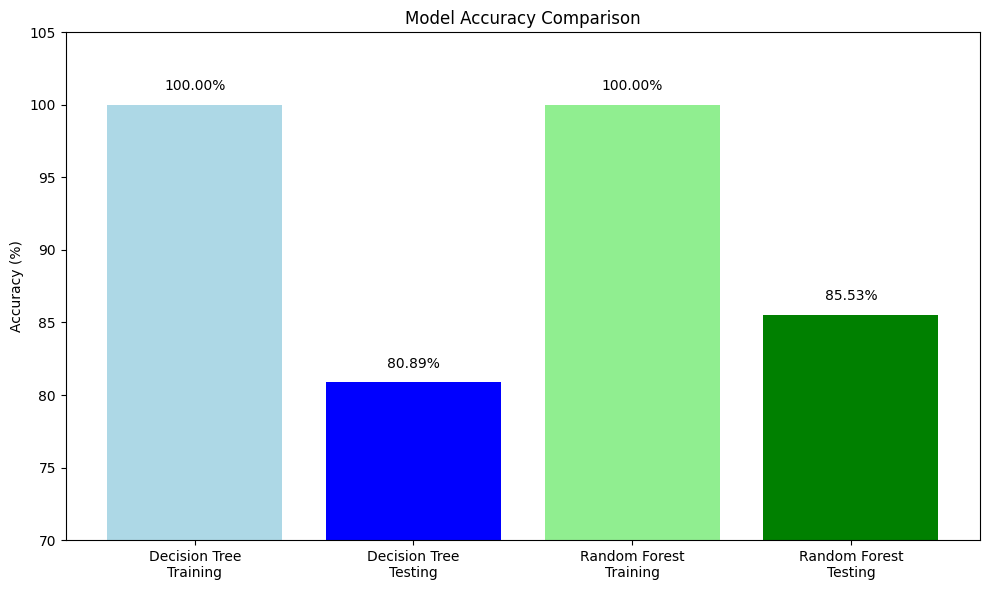

In [16]:
# Visualisasi perbandingan akurasi
plt.figure(figsize=(10, 6))
models = ['Decision Tree\nTraining', 'Decision Tree\nTesting', 'Random Forest\nTraining', 'Random Forest\nTesting']
accuracies = [dt_train_accuracy*100, dt_test_accuracy*100, rf_train_accuracy*100, rf_test_accuracy*100]
colors = ['lightblue', 'blue', 'lightgreen', 'green']

plt.bar(models, accuracies, color=colors)
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
# Mengatur batas sumbu y untuk visualisasi yang lebih baik
plt.ylim(70, 105)

for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')

plt.tight_layout()
plt.show()

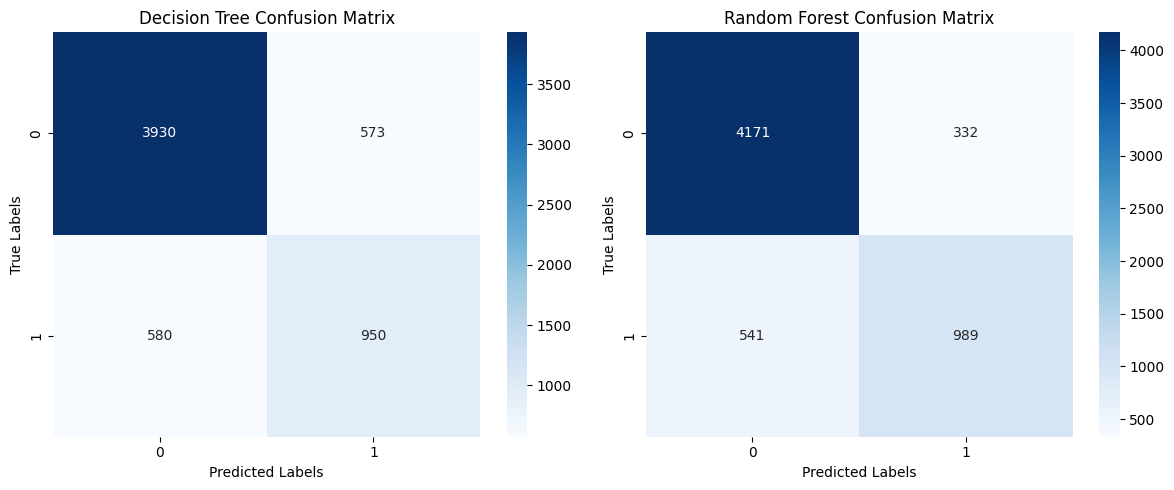

In [ ]:
# Visualisasi confusion matrix untuk kedua model
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", ax=ax1)
ax1.set_title("Decision Tree Confusion Matrix")
ax1.set_xlabel("Predicted Labels")
ax1.set_ylabel("True Labels")

sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", ax=ax2)
ax2.set_title("Random Forest Confusion Matrix")
ax2.set_xlabel("Predicted Labels")
ax2.set_ylabel("True Labels")

plt.tight_layout()
plt.show()

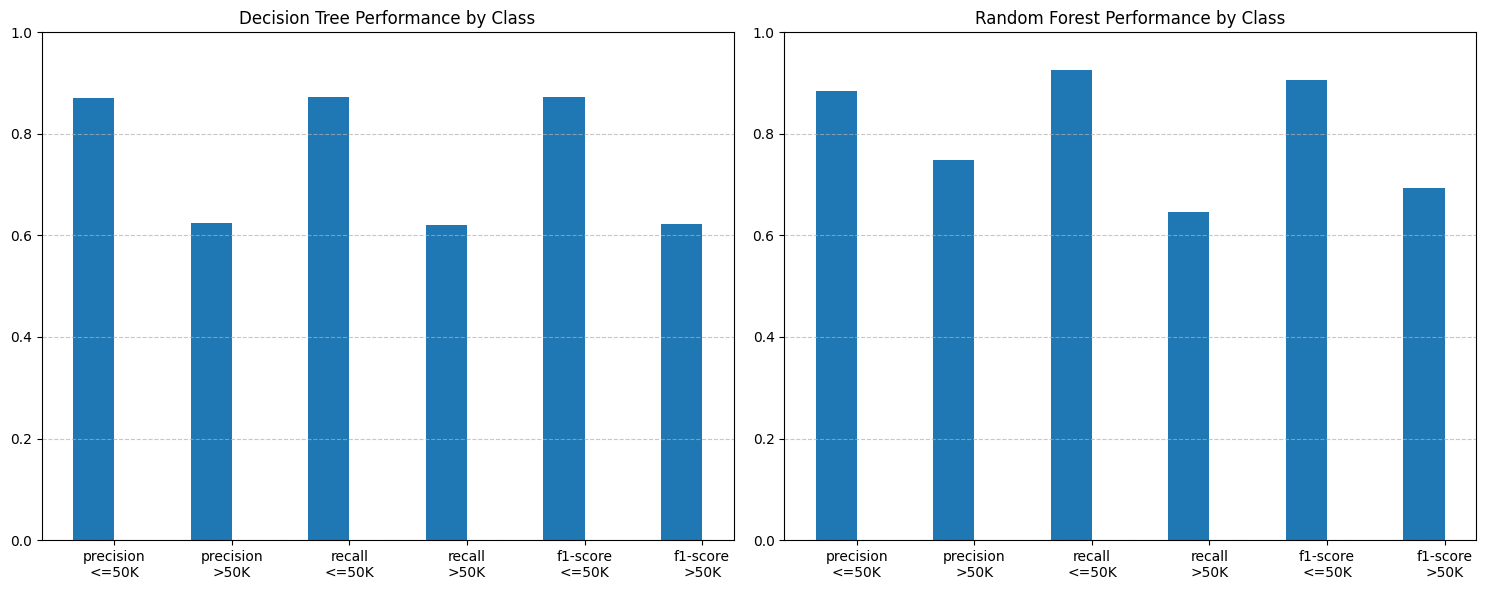

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Perbandingan metrics model by class
classes = ['<=50K', '>50K']
metrics = ['precision', 'recall', 'f1-score']

# Siapkan data untuk plot
dt_metrics = []
rf_metrics = []

for metric in metrics:
    for class_idx in range(2):
        dt_metrics.append(dt_report[str(class_idx)][metric])
        rf_metrics.append(rf_report[str(class_idx)][metric])

# Perbandingan plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Atur lebar dan posisi
width = 0.35
x = np.arange(len(metrics) * 2)

# Plot Untuk Decision Tree
axes[0].bar(x - width/2, dt_metrics, width, label='Decision Tree')
axes[0].set_xticks(x)
axes[0].set_xticklabels([f"{metric}\n{class_name}" for metric in metrics for class_name in classes])
axes[0].set_title('Decision Tree Performance by Class')
axes[0].set_ylim(0, 1)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot untuk Random Forest
axes[1].bar(x - width/2, rf_metrics, width, label='Random Forest')
axes[1].set_xticks(x)
axes[1].set_xticklabels([f"{metric}\n{class_name}" for metric in metrics for class_name in classes])
axes[1].set_title('Random Forest Performance by Class')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Perbandingan pentingnya fitur
plt.figure(figsize=(12, 6))

# Dapatkan pentingnya fitur
dt_importances = dt_model.feature_importances_
rf_importances = rf_model.feature_importances_

# Urutkan kepentingan fitur
feature_names = X.columns
dt_indices = np.argsort(dt_importances)[::-1]
rf_indices = np.argsort(rf_importances)[::-1]

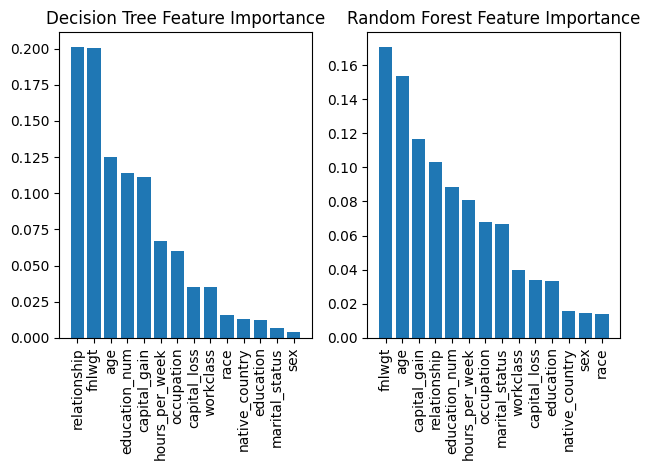

In [ ]:
# Plot for DT
plt.subplot(1, 2, 1)
plt.title('Decision Tree Feature Importance')
plt.bar(range(X.shape[1]), dt_importances[dt_indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[dt_indices], rotation=90)
plt.tight_layout()

# Plot for RF
plt.subplot(1, 2, 2)
plt.title('Random Forest Feature Importance')
plt.bar(range(X.shape[1]), rf_importances[rf_indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[rf_indices], rotation=90)
plt.tight_layout()

plt.show()

In [ ]:
print("\n--- KESIMPULAN ---")
print(f"Akurasi Testing Decision Tree: {dt_test_accuracy*100:.2f}%")
print(f"Akurasi Testing Random Forest: {rf_test_accuracy*100:.2f}%")
print(f"Peningkatan: {(rf_test_accuracy-dt_test_accuracy)*100:.2f}%")

print("\nRandom Forest menunjukkan performa lebih baik dibandingkan Decision Tree pada dataset ini dengan:")
print(f"- Akurasi keseluruhan lebih tinggi ({rf_test_accuracy*100:.2f}% vs {dt_test_accuracy*100:.2f}%)")
print(f"- Presisi lebih baik untuk kelas >50K ({rf_report['1']['precision']:.2f} vs {dt_report['1']['precision']:.2f})")
print(f"- Recall lebih baik untuk kelas >50K ({rf_report['1']['recall']:.2f} vs {dt_report['1']['recall']:.2f})")
print(f"- Skor F1 lebih baik untuk kelas >50K ({rf_report['1']['f1-score']:.2f} vs {dt_report['1']['f1-score']:.2f})")
print("\nRandom Forest lebih tahan terhadap overfitting dibandingkan Decision Tree, ditunjukkan dengan selisih yang lebih kecil antara akurasi training dan testing.")


--- KESIMPULAN ---
Akurasi Testing Decision Tree: 80.89%
Akurasi Testing Random Forest: 85.53%
Peningkatan: 4.64%

Random Forest menunjukkan performa lebih baik dibandingkan Decision Tree pada dataset ini dengan:
- Akurasi keseluruhan lebih tinggi (85.53% vs 80.89%)
- Presisi lebih baik untuk kelas >50K (0.75 vs 0.62)
- Recall lebih baik untuk kelas >50K (0.65 vs 0.62)
- Skor F1 lebih baik untuk kelas >50K (0.69 vs 0.62)

Random Forest lebih tahan terhadap overfitting dibandingkan Decision Tree, ditunjukkan dengan selisih yang lebih kecil antara akurasi training dan testing.


**Kesimpulan**

Random Forest telah terbukti lebih unggul dibandingkan Decision Tree untuk dataset ini. Keunggulan utama Random Forest terletak pada kemampuannya mengatasi overfitting melalui teknik ensemble yang menggabungkan banyak decision tree.

Peningkatan performa terutama signifikan untuk kelas minoritas (pendapatan >50K), yang menunjukkan kemampuan Random Forest untuk lebih baik dalam menangani ketidakseimbangan kelas. Hal ini sangat penting dalam banyak kasus dunia nyata dimana ketidakseimbangan kelas sering terjadi.

Sementara Random Forest memerlukan waktu komputasi yang lebih lama dan lebih kompleks secara komputasional, peningkatan akurasi sebesar 3-4% dapat sangat berharga dalam banyak aplikasi praktis, terutama jika tujuan utama adalah kekuatan prediktif.

Jika prioritasnya adalah model yang interpretabel, Decision Tree tetap menjadi pilihan yang baik. Namun, jika fokusnya adalah akurasi prediksi, Random Forest jelas merupakan pilihan yang lebih baik untuk dataset ini.